<a href='http://m.site.naver.com/0ZMyL'><img src='https://qrcodethumb-phinf.pstatic.net/20220721_243/1658362169896Lk8dk_PNG/0ZMyL.png'/></a>

- 주소: https://sites.google.com/view/minds-academy-2th/
- 실습 자료 클릭 -> 우측 상단 다운로드 아이콘 클릭 -> 저장 및 압축 풀기 -> 주피터 파일 업로드

# 1. 머신러닝과 딥러닝 실습

In [5]:
import pylab
import numpy as np

수학 = np.array([32, 43, 65, 76, 60, 89, 98, 58, 73])
과학 = np.array([40, 59, 70, 80, 58, 95, 98, 65, 68])

## 1.1 인공지능이 만들어주는 모델

위에서 우리는 그래프를 보고 직접 매개변수인 `a`와 `b`를 지정해 주었습니다. 사람이 데이터를 보고 직접 모델을 만들어 준 것이죠. 인공지능은 사람이 하는 일을 대신 해주죠? 인공지능, 더 정확히는 **기계학습 (machine learning)** 은 사람 대신에 데이터를 보고, 데이터를 가장 잘 설명할 수 있는 매개변수를 결정해주는 방법론입니다.

그럼, 기계학습은 어떻게 가장 좋은 매개변수를 결정해줄까요? 매개변수가 정해지면 모델의 모양이 결정됩니다. 모델의 모양이 결정되면 모델이 예측한 과학 점수와 $f(x)$와 실제 학생의 과학 점수의 차이를 계산할 수 있게 됩니다. 과학 점수를 잘 예측하는 모델일수록 예측 점수와 실제 점수 사이의 오차가 작을 것입니다. 우리는 모든 데이터에서 발생한 오차의 제곱의 합을 가장 작게 만들어주는 매개변수를 찾아서 사용하게 됩니다. 

$$
\begin{matrix}
a^{*}, b^{*} & = & \operatorname*{argmin}\sum\limits_{i=1}^{9}\left( \text{과학}_i - f(\text{수학}_i) \right)^2 \\
 & = & \operatorname*{argmin}\sum\limits_{i=1}^{9}\left( \text{과학}_i - (a\times\text{수학}_i + b) \right)^2
\end{matrix}
$$

그럼, 기계학습 모델을 사용하여 매개변수를 찾아볼까요? `torch`라는 것은 기계학습 모델 중에서도 딥러닝 모델을 만들 때 사용하는 패키지입니다. `nn.Linear`는 위에서 본 선형모델을 만들어주는 기능을 합니다. 우리의 경우 독립 변수가 하나, 종속 변수가 하나이기 때문에 `nn.Linear`의 첫 번쨰, 두 번째 인자를 각각 1로 넣어주게 됩니다.

In [2]:
!pip install torch

In [3]:
import torch.nn as nn

model = nn.Linear(1, 1)

In [6]:
from academy import train

train(model, 수학, 과학)

Log:   0%|          | 0/100 [00:00<?, ?it/s]

모델이 만들어지면, `academy`에 있는 `train`을 사용해서 모델의 매개변수를 찾아주는 학습을 진행할 수 있습니다. `epochs` 인자는 데이터를 몇 번 반복해서 볼 것인지 결정해주고, `lr`은 매개변수를 얼마나 조금씩 수정해나갈 것인지 결정해주는 인자입니다. 

In [8]:
model.bias

Parameter containing:
tensor([0.9336], requires_grad=True)

모델의 매개변수는 다음과 같이 불러올 수 있습니다. 독립변수에 곱해지는 매개변수는 `model.weight`에 저장되어 있고, y절편 역할을 하는 매개변수는 `model.bias`에 저장되어 있습니다.

1.0131710767745972 0.9335988759994507


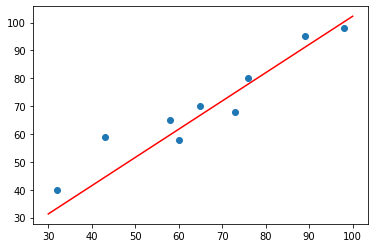

In [9]:
a = model.weight.item()
b = model.bias.item()

print(a, b)

x = np.array([30, 100])
y = a * x + b

pylab.plot(수학, 과학, 'o')
pylab.plot(x, y, 'r-')

지금까지 우리는 하나의 독립변수로 하나의 종속변수를 예측하는 모델을 만들어 보았습니다. 하지만 현실의 데이터는 훨씬 더 많은 독립 변수를 갖고 있습니다. 독립변수가 많아져도 선형모델은 여전히 같은 원리로 종속변수를 예측합니다. 예를 들어 5개의 독립변수를 사용하는 선형모델은 다음 식으로 종속변수를 예측합니다.

$$\hat{Y}=w_1X_1+w_2X_2+w_3X_3+w_4X_4+w_5X_5+w_6$$

이를 그림으로 도식화해보면 다음과 같습니다.

![mlr](https://raw.githubusercontent.com/postech-minds/math-academy-2th/master/mlr.png)

매개변수 $w_1, \cdots, w_6$ 중에서 실제 종속변수 값과 모델의 예측값 사이의 오차를 가장 작게 만들어주는 매개변수를 찾게 됩니다. 

$$w_1^*,\cdots,w_6^* = \operatorname*{argmin}\limits_{w_1,w_2,\cdots,w_6}\sum\limits_{(X, Y) \in \mathbb{D}}\left(Y-\hat{Y}\right)^2$$


## 1.2 딥러닝이 그리는 사인 곡선
앞에서 말했던 것처럼 선형모델은 독립변수와 종속변수 사이의 선형관계 밖에 설명하지 못하는 모델입니다. 최근에 많이 대두되고 있는 딥러닝 모델들은 변수 사이의 선형관계를 넘어서 아주 복잡한 관계까지 설명할 수 있습니다. 이번에는 딥러닝으로 사인 곡선을 만들어보도록 하겠습니다.

<br>

먼저 $0\le x \le 2\pi$를 400등분하여 `x` 변수에 넣고, 각 위치에서 사인값을 `f` 변수에 넣도록 하겠습니다.

`x`와 `f`를 각각 출력해보면 다음과 같습니다.

이 많은 데이터들을 눈으로 해석하기는 어렵기 때문에 시각화를 해서 봐보도록 하겠습니다.

사인 그래프에서 뽑은 400개의 데이터를 오직 직선만을 이용해서 효과적으로 나타낼 수 있을까요? 아무래도 어렵겠죠? 이런 직선과 다르게 사인 그래프처럼 구불구불 거리는 함수를 비선형 함수라고 합니다. 딥러닝을 이용하면 이런 비선형 함수에서 뽑은 데이터들도 효과적으로 모델링 수 있습니다.

노래를 포함한 모든 소리들은 시간에 따른 음의 높낮이로 나타낼 수 있습니다. 음의 높낮이를 일반적으로 신호라고 부릅니다. 이 사인 곡선을 시간에 따라 변하는 신호라고 생각해봅시다. 우리가 이번에 만들 모델은 과거의 10개 신호 값으로 다음 신호를 예측하는 모델을 만들어보겠습니다. 우리의 모델을 함수 $g$라고 하면 $g$는 과거 10개의 신호값을 받아서 다음 신호값을 출력해주는 함수입니다.

$$ f_{t+1} \approx g\left(f_{t}, f_{t-1}, \cdots, f_{t-9} \right)$$

<br>

$f_{t+1}$은 $t+1$ 시점의 신호값이고, $g$는 과거 10개의 신호 $f_{t}, f_{t-1}, \cdots, f_{t-9}$를 입력 받아서 최대한 $f_{t+1}$을 정확하게 예측해야 하는 모델입니다. 아래의 코드 셀에는 400개의 신호값에서 순차적으로 10개씩 떼어내서 `X` 변수에 저장하고, 다음 신호를 `y` 변수에 저장해놓았습니다. 우리의 딥러닝 모델은 `X`와 `y`를 여러번 보면서 가장 좋은 매개변수를 찾아낼 것입니다. 

In [ ]:
X = []
y = []
for i in range(400 - 10):
    X.append(f[i:i+10])
    y.append(f[i+10])
X = np.array(X)
y = np.array(y).reshape((-1, 1))

다음 셀은 딥러닝 모델은 만들어 내는 코드입니다. 10개의 신호값을 입력 받아서 이를 32개의 신호로 변환해주고, 또 다시 32개의 신호로 변환해준 후 하나의 신호를 예측해주게 됩니다. 중간에 있는 `nn.ReLU`는 변수 사이의 더 복잡한 관계를 설명하기 위해 꼭 필요한 함수입니다. 도식화하면 다음과 같습니다.

![mlp](https://raw.githubusercontent.com/postech-minds/math-academy-2th/master/mlp.png)

각 선분에서는 매개변수가 더해지고, 만나는 원에서 서로 모두 더해져요. 10개의 신호가 32개의 신호로 변하고, 다시 한 번 더 32개의 신호로 변하고, 마지막으로 하나의 신호를 예측하게 되는 것이죠.

`train`을 사용하며 모델을 학습시켜 봅시다.

훈련이 완료되면, 모델에 처음 10개의 신호값을 주고 다음 신호값을 예측할 수 있습니다. 예측한 신호값 포함하여 최근 10개의 신호값을 다시 모델에 입력하면 그 다음 신호값을 예측할 수 있습니다. 이 과정을 반복하면, 처음 10개의 신호값으로 더 먼 미래의 신호를 예측하여 만들어낼 수 있습니다.

$$\begin{matrix}
g\left(f_1, f_2, \cdots, f_{10}\right) & \rightarrow & \hat{f}_{11} \\
g\left(f_2, f_3, \cdots, \hat{f}_{11}\right) & \rightarrow & \hat{f}_{12} \\
g\left(f_3, f_4, \cdots, \hat{f}_{12}\right) & \rightarrow & \hat{f}_{13} \\
\vdots & & \vdots
\end{matrix}$$

`academy`의 `forecast`를 사용해서 처음 10개의 신호값에서 시작해서 미래 사인곡선을 예측해볼까요?

우리가 기대했던 사인곡선이 아니군요. 아직 딥러닝 모델이 충분히 학습되지 않았기 때문입니다. `lr`을 더 줄여서 학습을 해보겠습니다.

완벽하지는 않지만 사인곡선을 얼추 비슷하게 그려내게 되었습니다!! 딥러닝 모델은 사인함수가 어떻게 생겼는지 전혀 모릅니다. 그런데 데이터만 보고 사인함수가 어떻게 생겼을지 만들어 본 것입니다. 이처럼 딥러닝은 데이터만 주어진다면, 데이터를 만들어 낸 알 수 없는 함수를 만들어낼 수 있습니다.

---

# 2. 국악을 작곡하는 다양한 방법
자, 마지막으로 국악을 작곡하는 다양한 딥러닝 기법들에 알아볼 예정이에요. 국악을 작곡하는 딥러닝은 한 가지만 있는게 아니라 여러가지 방법이 있어요. 아직은 여러분들이 딥러닝에 익숙하지 않아서 어떻게 모델링 해야 할지 잘 감이 안 오겠지만, 여러분들이 나중에 스스로 작곡하는 인공지능을 직접 만들 수도 있답니다.

In [ ]:
import pylab
import numpy as np

import torch
import torch.nn as nn

from academy import train, forecast, Music

## 2.1 국악 데이터를 쉽게 다룰 수 있게 만들어주는 `Music` 클래스
정간보를 이용해서 국악을 작곡하기 위해서 우리는 먼저 정간보를 데이터로 변환해주었습니다. 정간보를 데이터로 바꿀 수 있는 당연한 방법이 있겠지만, 우리는 특정 율명이 얼마나 오래 연주되었는가를 나타내었습니다. 특히, `율명의진동수.율명의길이`로 나타내주었습니다. 우리는 이제 정간보 악보 사진 대신 숫자들을 나열해서 정간보를 나타낼 수 있게 되었습니다. 정간보 데이터를 잘 다루기 위하여 `academy` 라이브러리에 있는 `Music`을 불러와서 사용하도록 하겠습니다.

In [ ]:
music = Music()
music.load_music('sooyeonjang_gayageum_allnode.txt')
music.load_nodelist('sooyeonjang_gayageum_nodelist.txt')

In [ ]:
print(music)
print("Print the music: ", music.music)
print("==============")
print("Print the list of nodes", music.nodelist)
print("Print the index flow", music.indexed_music)

## 2.2 소리의 진동수와 길이를 바로 예측하는 모델
우리가 데이터화한 정간보는 마치 사인 데이터처럼 숫자들을 쭉 나열할 것입니다. 사인 곡선 만들기 예시처럼 과거 10개의 값으로 다음 신호를 예측하는 모델을 만들 수 있겠죠? 모델은 일단 훈련시키면, 처음 노트 10개만 모델에 넣으면 `forecast` 함수를 사용해서 노래를 만들어 낼 수 있을 것입니다. 먼저, 노래를 시각화해볼까요?

In [ ]:
pylab.plot(music.music)

In [ ]:
music.music.max()

사인 곡선 예시 때처럼 데이터를 $k$씩 떼어내서 `X` 변수에 넣고, 다음 데이터를 떼어내서 `y` 변수에 넣을게요. 그리고 우리 데이터가 가지는 값의 범위가 78.06부터 415.1 값을 가집니다. 하지만 딥러닝 모델을 학습시킬 땐, 데이터를 0과 1사이면 좋기 때문에 데이터의 최소값과 최대값을 이용해서 0과 1사이로 변환해주겠습니다.

### 데이터 만들기

In [ ]:
k = 10

X = []
y = []
for i in range(music.length - k):
    X.append(
        (music.music[i:i+k] - min(music.music)) / (max(music.music) - min(music.music))
    )
    y.append(
        (music.music[i+k] - min(music.music)) / (max(music.music) - min(music.music))
    )
X = np.array(X)
y = np.array(y).reshape((-1, 1))

### 모델 만들기

In [ ]:
hidden = 64
model = nn.Sequential(
    nn.Linear(k, hidden),
    nn.ReLU(),
    nn.Linear(hidden, hidden),
    nn.ReLU(),
    nn.Linear(hidden, 1)
)

### 훈련 시키기

In [ ]:
train(model, X, y, epochs=500, lr=0.001)

### 결과 확인

In [ ]:
x = torch.from_numpy(X[0]).float()
new = forecast(model, x, music.length)
new = (max(music.music) - min(music.music)) * new + min(music.music)
pylab.plot(new)

### 훈련 시키기

In [ ]:
train(model, X, y, epochs=500, lr=0.001)

### 결과 확인

In [ ]:
x = torch.from_numpy(X[0]).float()
new = forecast(model, x, music.length)
new = (max(music.music) - min(music.music)) * new + min(music.music)
pylab.plot(new)

In [ ]:
train(model, X, y, epochs=500, lr=0.001)

In [ ]:
x = torch.from_numpy(X[0]).float()
new = forecast(model, x, music.length)
new = (max(music.music) - min(music.music)) * new + min(music.music)
pylab.plot(new)

## 2. RNN을 이용한 음악 작곡

### 모델 만들기

In [ ]:
from academy import LSTM

model = LSTM(
    input_size=1,
    hidden_size=32,
    output_size=1,
    num_layers=1,
)

### 데이터 만들기

In [ ]:
X = music.music[:-1].reshape((music.length - 1, 1, 1))
X = (X-X.min()) / (X.max() - X.min())
X = torch.from_numpy(X).float()

y = torch.from_numpy(music.music[1:]).float()
y = (y - y.min()) / (y.max() - y.min())

### 훈련 시키기

In [ ]:
train(model, X, y, epochs=500)

### 결과 확인

In [ ]:
new = forecast(model, X[0].item(), music.length, recurrent=True)
new = (music.music.max() - music.music.min()) * new + music.music.min()
pylab.plot(new)

### 훈련 시키기

In [ ]:
train(model, X, y, epochs=500)

### 결과 확인

In [ ]:
new = forecast(model, X[0].item(), music.length, recurrent=True)
new = (music.music.max() - music.music.min()) * new + music.music.min()
pylab.plot(new)

### 훈련 시키기

In [ ]:
train(model, X, y, epochs=500)

### 결과 확인

In [ ]:
new = forecast(model, X[0].item(), music.length, recurrent=True)
new = (music.music.max() - music.music.min()) * new + music.music.min()
pylab.plot(new)

## 3. 중첩행렬을 이용한 작곡

In [ ]:
from academy import OverlapMatrixModel
from sklearn.model_selection import train_test_split

In [ ]:
cycle_nodes = [
    [2, 4, 5, 6],
    [31, 32, 33, 34],
    [2, 3, 14, 15],
    [0, 20, 21, 32, 42],
    [2, 3, 10, 11, 12],
    [31, 34, 36, 39],
    [0, 2, 3, 19, 20, 26, 27, 28, 29, 30],
    [31, 36, 37, 38],
    [0, 2, 3, 19, 31, 32, 33, 43, 44],
    [0, 16, 25, 26],
    [31, 36, 37, 40, 41]
]

music = Music(cycles=cycle_nodes)
music.load_music('sooyeonjang_gayageum_allnode.txt')
music.load_nodelist('sooyeonjang_gayageum_nodelist.txt')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

overlap_matrix = music.overlap_matrix

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
ax = sns.heatmap(np.transpose(overlap_matrix), cbar=False)
plt.show()

### 데이터 만들기

In [ ]:
length = music.length
n_nodes = music.num_nodes

matrix_used = music.overlap_matrix
overlap_matrix_duplicated = np.concatenate((matrix_used, matrix_used), axis=0)


L_encoded = music.indexed_music
L_onehot = np.zeros((length, n_nodes), dtype=np.bool)
for i, idx in enumerate(L_encoded):
    L_onehot[i, idx] = 1
L_onehot_duplicated = np.concatenate((L_onehot, L_onehot))
L_encoded_duplicated = np.concatenate((L_encoded, L_encoded))

print("The shape of overlap_matrix_duplicated : ", overlap_matrix_duplicated.shape)
print("The shape of L_onehot_duplicated : ", L_onehot_duplicated. shape)
print("The shape of L_encoded_duplicated : ", L_encoded_duplicated. shape)

# Dongjin's implementation April 26
start_indices = music.beat_start_indices()
X = np.stack([overlap_matrix_duplicated[i:i + length].flatten() for i in start_indices])
y = np.stack([L_onehot_duplicated[i:i + length].flatten() for i in start_indices])
y = np.stack([L_encoded_duplicated[i:i + length].flatten() for i in start_indices])

print("The shape of X: ", X.shape)
print("The shape of y: ", y.shape)

X = X.astype(np.float32)
y = y.astype(np.int64)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=1)

dim_input = X.shape[1]
dim_output = y.shape[1] * n_nodes
dim_hidden = length

### 모델 만들기

In [ ]:
model = OverlapMatrixModel(dim_input, dim_hidden, dim_output, music.num_nodes)

### 훈련 시키기

In [ ]:
train(model, X_train, torch.from_numpy(y_train.flatten()), task='classification')

### 결과 확인

In [ ]:
overlap_matrix = music.overlap_matrix
X = np.transpose(overlap_matrix)
Generated_Music = np.argmax(model(torch.tensor(X.flatten(), dtype=torch.float32)).detach().numpy(), axis=1)
print(Generated_Music)

In [ ]:
####### Cycle node numbers ###################
cycle1_number = [20, 27, 18, 22]
cycle2_number = [6, 12, 3, 18]
cycle3_number = [20, 26, 23, 16, 22]
cycle4_number = [6, 11, 2, 7, 0, 6]
cycle5_number = [6, 18, 21, 16, 6, 18]
cycle6_number = [18, 6, 1, 24, 21]
cycle7_number = [18, 6, 22, 27, 30, 25]
cycle8_number = [27, 22, 29, 30]

pitch = ['D#2', 'F2', 'G#2', 'A#2', 'C3', 'D#3', 'F3', 'G#3', 'A#3', 'C4', 'D#4', 'F4', 'G#4'] #--> node list from lower to higher
midi_number = [39, 41, 44, 46, 48, 51, 53, 56, 58, 60, 63, 65, 68]
#freq_number = [78, 87, 104, 117, 131, 156, 175, 208, 233, 262, 311, 349, 415]

repeat = [1, 2, 4, 4, 1, 5, 4, 6, 6, 4, 4, 5, 2] # ---> the sum is 48 (total # of nodes)
n_repeat = len(repeat)
syj_pitch = []
syj_midi = []
for i in range(n_repeat):
    j = repeat[i]
    for k in range(j):
        syj_pitch.append(pitch[i])
        syj_midi.append(midi_number[i])
p = syj_pitch
m = syj_midi

######## LENGTH ################
syj_tempo = [1.0, 0.33, 1.0, 0.67,
             1.0, 1.67, 2.0, 0.33,
             0.67, 1.0, 2.0, 1.0,
             0.17, 0.33, 1.0, 1.67,
             2.0, 0.17, 0.33, 1.0,
             1.67, 0.33, 0.67, 0.83,
             1.0, 1.67, 2.0, 0.17, 0.33,
             0.67, 0.83, 1.0, 2.0, 0.33,
             0.67, 1.0, 1.67, 0.17, 0.33,
             1.0, 1.67, 0.33, 0.67, 0.83,
             1.0, 2.0, 1.0, 1.67]
n = len(syj_tempo)
t = []
for i in range(n):
    tmp = int(2*syj_tempo[i]/0.33)
    t.append(tmp)
    
####### Cycle pitch + tempo function ##################
def cycle_generate(cycle_number, m, t):
    cycle = []
    n = len(cycle_number)
    for i in range(n):
        c = cycle_number[i]
        midi = m[c]
        tempo = t[c]
        cycle.append([midi, tempo])
    return cycle

def choose_node(z, m, t):
    
    node_current = cycle_generate([z], m, t)
    int_midi_number=int(node_current[0][0])
    int_midi_duration=int(node_current[0][1])
    n1 = note.Note(int_midi_number)
    n1.duration=duration.Duration(0.5 * int_midi_duration)
    
    return n1

In [ ]:
###########################
# From node to new music 
from music21 import *

s1 = stream.Stream()
s1.clear()
s1.insert(0, meter.TimeSignature('6/4'))
s1.keySignature= key.KeySignature(-3)

#node_sequence = loadtxt('Generated_Music_allnode_8.txt')
node_sequence = Generated_Music

N = len(node_sequence)

for i in range(N):
    z = int(node_sequence[i])
    n1 = choose_node(z, m, t)
    s1.append(n1)

s1.show()

NewComposition=stream.Stream()
NewComposition.clear()
NewComposition.insert(0, meter.TimeSignature('12/8'))
NewComposition.keySignature= key.KeySignature(-3)
NewComposition.append(s1)
NewComposition.show('midi')
NewComposition.write("midi", "NewComposition.mid")